In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [2]:
df= pd.read_csv('scraped_tweets.csv')
df

,Unnamed: 0,username,hashtag,difference,times of all tweets
0,0,imsurya95,BoycottbollywoodCompletely,0 days 00:00:00,"[datetime.datetime(2022, 9, 6, 7, 19, 36, tzin..."
1,1,aravindarajm005,2point0,1 days 02:48:57,"[datetime.datetime(2022, 12, 28, 16, 2, 30, tz..."
2,2,aravindarajm005,Kabali,0 days 00:00:00,"[datetime.datetime(2022, 12, 28, 16, 2, 30, tz..."
3,3,aravindarajm005,Jailer,0 days 07:59:26,"[datetime.datetime(2022, 12, 27, 13, 28, 40, t..."
4,4,aravindarajm005,Rajinikanth,0 days 07:59:26,"[datetime.datetime(2022, 12, 27, 13, 28, 40, t..."
...,...,...,...,...,...
10441,10441,rrahulforever_,RraMaan,0 days 00:00:00,"[datetime.datetime(2022, 12, 3, 13, 31, 35, tz..."
10442,10442,rrahulforever_,FahmaanKhan,0 days 00:00:00,"[datetime.datetime(2022, 11, 28, 19, 42, 56, t..."
10443,10443,naveenlakkamraj,HBDYSJagan,0 days 00:07:25,"[datetime.datetime(2022, 12, 20, 12, 21, 50, t..."
10444,10444,naveenlakkamraj,JayahoBC,0 days 00:00:00,"[datetime.datetime(2022, 12, 7, 4, 17, 36, tzi..."


In [3]:
df['difference'] = df['difference'].apply(lambda x: pd.to_timedelta(x).total_seconds())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10446 entries, 0 to 10445
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10446 non-null  int64  
 1   username             10446 non-null  object 
 2   hashtag              10446 non-null  object 
 3   difference           10446 non-null  float64
 4   times of all tweets  10446 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 408.2+ KB


In [4]:
s= df["difference"]
df_mean = df.groupby(['username'])['difference'].mean().mean()
df_std = np.std(df["difference"])
median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
IQR = q3 - q1
df_mean, df_std, median,q1,q3

(369686.77124012046, 2093720.1664032387, 422.0, 0.0, 172526.0)

In [5]:
pdf = norm.pdf(df["difference"].sort_values(), df_mean, df_std)

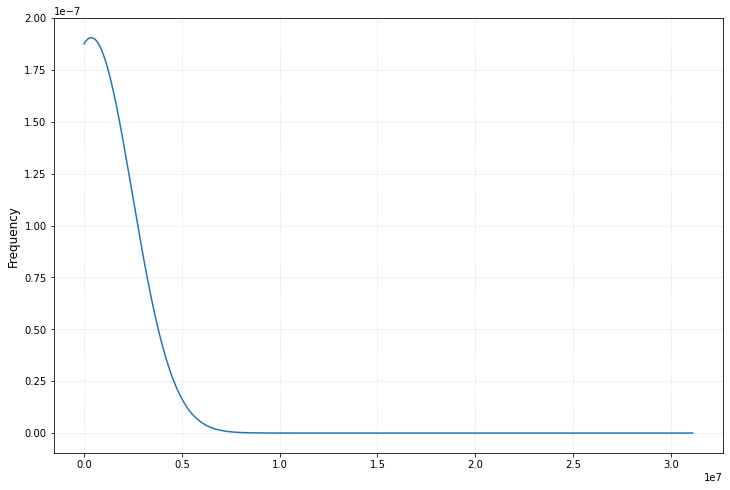

20486.341782674008

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(df["difference"].sort_values(), pdf)
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")



plt.show()
standard_error = df['difference'].sem()
standard_error

after removing outliers

In [7]:
df = df[~((df['difference'] < (q1 - 1.5 * IQR)) |(df['difference'] > (q3 + 1.5 * IQR)))]

s= df["difference"]
df_mean = df.groupby(['username'])['difference'].mean().mean()
df_std = np.std(df["difference"])
median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
IQR = q3 - q1
df_mean, df_std, median,q1,q3, df['difference'].max()

(31707.611483438668, 84528.40740128017, 0.0, 0.0, 10945.0, 431181.0)

In [8]:
pdf = norm.pdf(df["difference"].sort_values(), df_mean, df_std)

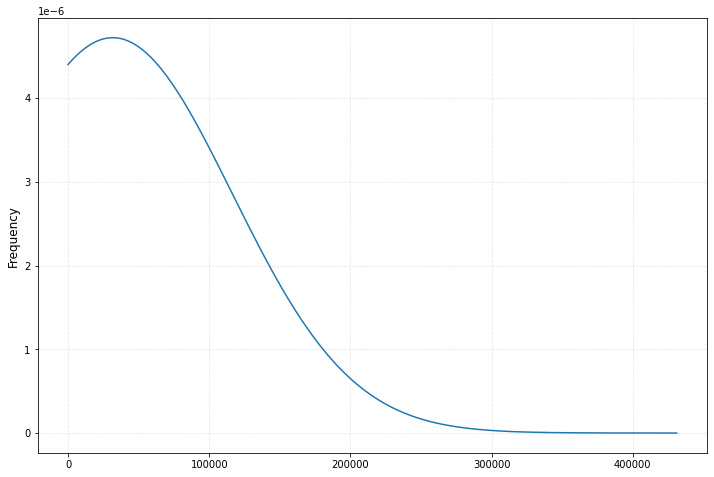

915.1719816106004

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df["difference"].sort_values(), pdf)
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")



plt.show()
standard_error = df['difference'].sem()
standard_error